### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import yfinance
start_date = "2017-01-01"
end_date = "2022-06-01"
symbol = "IOC.NS"

df = yfinance.download(tickers = symbol,start="2010-03-06",
                               interval = "1d", group_by = 'ticker', auto_adjust = True)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2010-03-08,26.707159,26.767476,26.375420,26.508978,3420936
2010-03-09,26.590840,26.668389,26.207400,26.315109,2820648
2010-03-10,26.160012,26.444362,26.069539,26.349579,2508072
2010-03-11,26.452974,26.625308,25.983369,26.220327,3387942
2010-03-12,26.280642,26.323725,26.030761,26.172935,1900506
...,...,...,...,...,...
2023-08-01,93.800003,94.750000,93.300003,94.000000,16132927
2023-08-02,94.400002,94.650002,93.000000,93.849998,16780965
2023-08-03,93.900002,94.199997,93.150002,93.500000,8703991


In [2]:
import pandas as pd

In [3]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-03-08,26.707159,26.767476,26.375420,26.508978,3420936
2010-03-09,26.590840,26.668389,26.207400,26.315109,2820648
2010-03-10,26.160012,26.444362,26.069539,26.349579,2508072
2010-03-11,26.452974,26.625308,25.983369,26.220327,3387942
2010-03-12,26.280642,26.323725,26.030761,26.172935,1900506


In [4]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-08-01,93.800003,94.750000,93.300003,94.000000,16132927
2023-08-02,94.400002,94.650002,93.000000,93.849998,16780965
2023-08-03,93.900002,94.199997,93.150002,93.500000,8703991
2023-08-04,93.550003,93.900002,92.050003,92.300003,10743670
2023-08-07,92.449997,93.000000,92.000000,92.849998,6944776


In [5]:
df1=df.reset_index()['Close']

In [6]:
df1

0       26.508978
1       26.315109
2       26.349579
3       26.220327
4       26.172935
          ...    
3310    94.000000
3311    93.849998
3312    93.500000
3313    92.300003
3314    92.849998
Name: Close, Length: 3315, dtype: float64

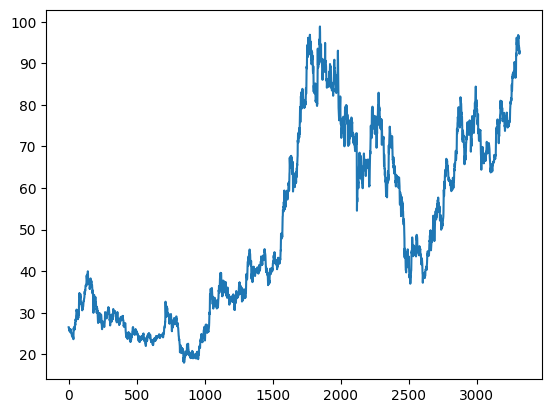

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [291]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [9]:
import numpy as np

In [10]:
df1

0       26.508978
1       26.315109
2       26.349579
3       26.220327
4       26.172935
          ...    
3310    94.000000
3311    93.849998
3312    93.500000
3313    92.300003
3314    92.849998
Name: Close, Length: 3315, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.10480766]
 [0.10240899]
 [0.10283547]
 ...
 [0.93366488]
 [0.91881772]
 [0.92562263]]


In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(2154, 1161)

In [15]:
train_data

array([[0.10480766],
       [0.10240899],
       [0.10283547],
       ...,
       [0.56717123],
       [0.55973935],
       [0.56831451]])

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(ytest.shape)

(2053, 100)
(1060,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(1060, 100)
(1060,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2023-08-07 17:00:30.424301: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
33/33 [==============================] - 15s 235ms/step - loss: 0.0273 - val_loss: 0.0054
Epoch 2/100
33/33 [==============================] - 6s 193ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 3/100
33/33 [==============================] - 6s 194ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 4/100
33/33 [==============================] - 6s 190ms/step - loss: 9.7460e-04 - val_loss: 0.0017
Epoch 5/100
33/33 [==============================] - 6s 193ms/step - loss: 9.6714e-04 - val_loss: 0.0016
Epoch 6/100
33/33 [==============================] - 7s 206ms/step - loss: 9.9845e-04 - val_loss: 0.0015
Epoch 7/100
33/33 [==============================] - 7s 209ms/step - loss: 8.8017e-04 - val_loss: 0.0019
Epoch 8/100
33/33 [==============================] - 6s 194ms/step - loss: 9.1777e-04 - val_loss: 0.0014
Epoch 9/100
33/33 [==============================] - 6s 194ms/step - loss: 8.4911e-04 - val_loss: 0.0015
Epoch 10/100
33/33 [==============================] - 7s 207ms/ste

33/33 [==============================] - 7s 208ms/step - loss: 1.9576e-04 - val_loss: 2.7022e-04
Epoch 77/100
33/33 [==============================] - 6s 196ms/step - loss: 1.8754e-04 - val_loss: 2.4272e-04
Epoch 78/100
33/33 [==============================] - 6s 197ms/step - loss: 1.9247e-04 - val_loss: 4.9274e-04
Epoch 79/100
33/33 [==============================] - 7s 215ms/step - loss: 1.9977e-04 - val_loss: 2.1096e-04
Epoch 80/100
33/33 [==============================] - 7s 209ms/step - loss: 1.9150e-04 - val_loss: 2.1195e-04
Epoch 81/100
33/33 [==============================] - 6s 193ms/step - loss: 1.8930e-04 - val_loss: 5.2760e-04
Epoch 82/100
33/33 [==============================] - 6s 194ms/step - loss: 2.3586e-04 - val_loss: 2.2384e-04
Epoch 83/100
33/33 [==============================] - 7s 211ms/step - loss: 1.7343e-04 - val_loss: 3.4999e-04
Epoch 84/100
33/33 [==============================] - 7s 205ms/step - loss: 2.1941e-04 - val_loss: 2.0603e-04
Epoch 85/100
33/33 [===

In [26]:
import tensorflow as tf

In [24]:
tf.__version__

'2.13.0'

In [27]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

34/34 [==============================] - 1s 40ms/step


In [44]:
test_predict

array([[495296.25],
       [495663.06],
       [512321.5 ],
       ...,
       [624691.75],
       [621754.7 ],
       [619168.44]], dtype=float32)

In [35]:
##Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict  = scaler.inverse_transform(test_predict)

In [43]:
test_predict

array([[495296.25],
       [495663.06],
       [512321.5 ],
       ...,
       [624691.75],
       [621754.7 ],
       [619168.44]], dtype=float32)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

4039.9624692322936

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

5412.696124942508

In [37]:
indexs = df.index

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


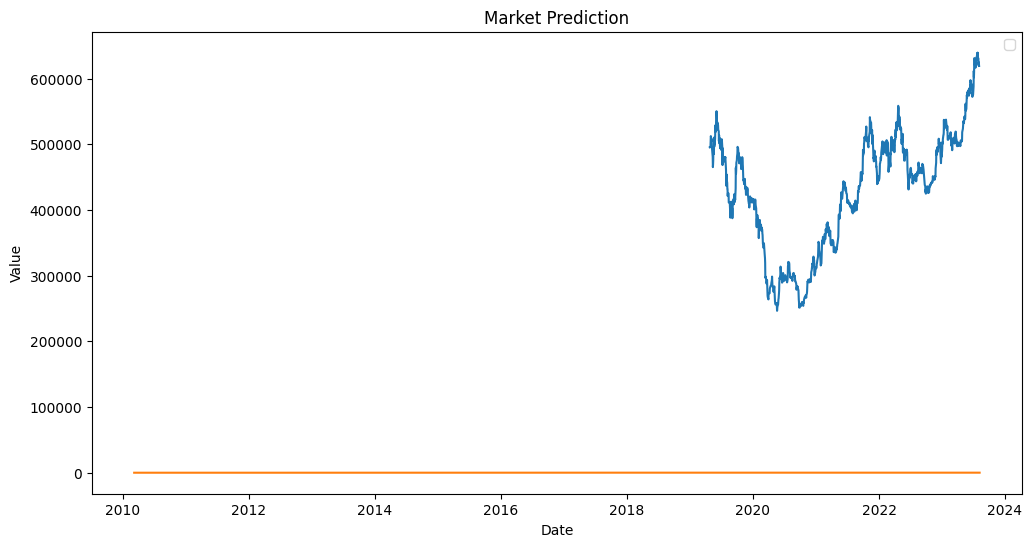

In [42]:
# shift test predictions for plotting
look_back =100
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

test_df = pd.DataFrame({"close" :testPredictPlot[:,0] ,"date" : indexs })
test_df['date'] = pd.to_datetime(test_df['date'])

# Set the 'Date' column as the index
test_df.set_index('date', inplace=True)
#test_df.plot(figsize=(12, 6))


plt.figure(figsize=(12, 6))  # Width: 8 inches, Height: 6 inches
plt.plot(test_df)
#plt.plot(trained_df)
plt.plot(df[["Close"]])


plt.title('Market Prediction')

plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()  # Show legend with labels
plt.show()

In [38]:
len(test_data)

1160

In [39]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 819)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.3082821188259639,
 0.29804931771571685,
 0.29804931771571685,
 0.2862178272739647,
 0.29165394681620493,
 0.3153171164915528,
 0.28685735964411985,
 0.28014222255953036,
 0.2663919934134302,
 0.2612756872542284,
 0.25232195088429155,
 0.2587175105756471,
 0.2558395205140273,
 0.2628744709816553,
 0.2574383042414542,
 0.25967671473495796,
 0.23441480853014413,
 0.23761251757888052,
 0.2507231199589038,
 0.25296153045240755,
 0.25967671473495796,
 0.27022928203028257,
 0.272787411510903,
 0.27374671006613566,
 0.3089216983940799,
 0.3277882808973427,
 0.3255498232058781,
 0.33322435324162203,
 0.3261894027739941,
 0.34857341331311,
 0.372236535790497,
 0.35656775673189234,
 0.35209088854692394,
 0.3418582290305595,
 0.3415384156475211,
 0.32810804708242025,
 0.3194741240955219,
 0.31627646224474637,
 0.3194741240955219,
 0.3223520669591807,
 0.33993958472213337,
 0.3482536471280324,
 0.33386388561177716,
 0.320753236033793,
 0.34697462958568304,
 0.33386388561177716,
 0.32267188034221

In [33]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

NameError: name 'temp_input' is not defined

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
import matplotlib.pyplot as plt

In [45]:
len(df1)

3314

ValueError: x and y must have same first dimension, but have shapes (100,) and (2156, 1)

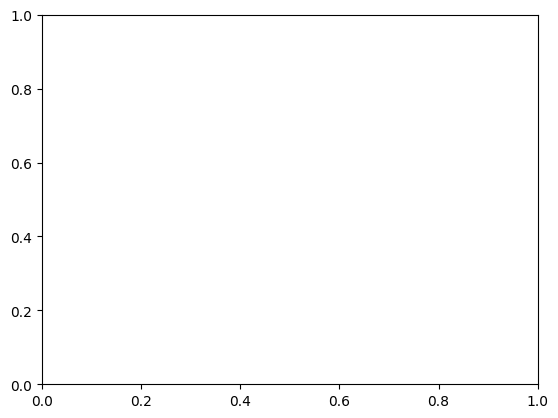

In [46]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

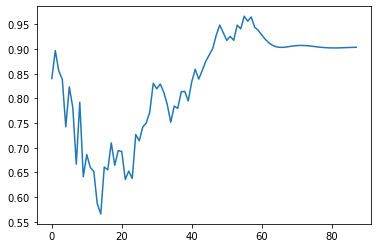

In [446]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [395]:
df3=scaler.inverse_transform(df3).tolist()

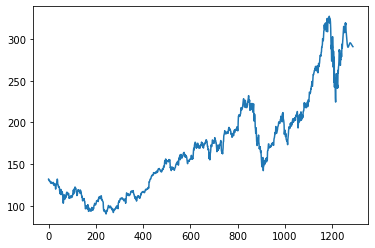

In [396]:
plt.plot(df3)